In [18]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [19]:
input_shape = (28, 28, 1)
num_classes = 10

In [20]:
inputs = layers.Input(input_shape, dtype=tf.float64)

# Feature Extraction
net = layers.Conv2D(32,(3,3),padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2))(net)
net = layers.Dropout(0.5)(net)

#Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net) # 클래스의 개수에 맞게 10개로 !
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs= inputs, outputs=net, name='Basic_CNN')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [21]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train, x_test = x_train / 255.0, x_test/ 255.0

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
image , label = next(iter(train_ds))

In [27]:
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

TypeError: Cannot convert '' to EagerTensor of dtype uint8

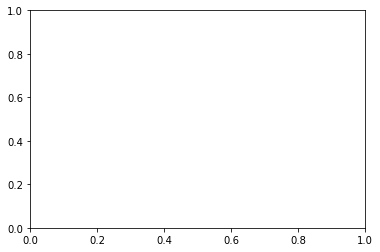

In [24]:
for image, label in train_ds.take(2):
    plt.title(label[0])
    plt.imshow(image[0,:,:,0], 'gray')
    plt.show()

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_ds, epochs=1)

Train for 1875 steps
 276/1875 [===>..........................] - ETA: 2:38 - loss: 0.5527

KeyboardInterrupt: 

In [30]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [31]:
train_loss = tf.keras.metrics.Mean(name= 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [32]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [33]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [34]:
for epoch in range(2):
    print('Start Training')
    for images, labels in train_ds:
        train_step(images, labels)
        
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss {}, Test Accuracy: {}'
    
    print(template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result() * 100,
                         test_loss.result(),
                         test_accuracy.result() * 100))
        
        

KeyboardInterrupt: 